In [ ]:
#| default_exp blandaltman_plots

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| export
from pheno_utils.config import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from typing import Tuple
import importlib

In [ ]:
#| export
try:
    importlib.import_module("pyCompare")
except ImportError:
    raise ImportError("The 'pyCompare' library is not installed. Please install it using 'pip install pyCompare' before running this script.")

from pyCompare import blandAltman

In [ ]:
#| export

def bland_altman_triple_plot(
    data: pd.DataFrame, m1_col: str, m2_col: str, feature_str: str = ""
) -> None:
    """
    Generates a triple plot consisting of a scatter correlation plot, Bland-Altman plot, and a percentage Bland-Altman plot.

    Args:
        data (pd.DataFrame): A pandas DataFrame containing the data.
        m1_col (str): The name of the first measurement column in the DataFrame.
        m2_col (str): The name of the second measurement column in the DataFrame.
        feature_str (str, optional): A string to include in the title of the plots. Defaults to "".

    Returns:
        None
    """

    m1 = data.dropna(subset=[m1_col, m2_col])[m1_col] 
    m2 = data.dropna(subset=[m1_col, m2_col])[m2_col]
    min_val = np.min([np.min(m1), np.min(m2)])
    max_val = np.min([np.max(m1), np.max(m2)])

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f"{feature_str} - Bland-Altman plots", fontsize=16)

    ax = axes[0]
    sns.regplot(x=m1, y=m2, ax=ax, scatter_kws=dict(alpha=0.3))
    ax.plot(
        [min_val * 0.99, max_val * 1.01],
        [min_val * 0.99, max_val * 1.01],
        ls=":",
        color="grey",
    )
    ax.set_xlim(min_val * 0.99, max_val * 1.01)
    ax.set_ylim(min_val * 0.99, max_val * 1.01)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    r = np.round(pearsonr(data.dropna(subset=[m1_col,m2_col])[m1_col], data.dropna(subset=[m1_col,m2_col])[m2_col])[0], 3)
    ax.set_title(f"r={r}")

    ax = axes[1]
    blandAltman(m1, m2, ax=ax)
    ax.set_xlabel(f"Mean of {m1.name} and {m2.name}")
    ax.set_ylabel(f"{m1.name} - {m2.name}")

    ax = axes[2]
    blandAltman(m1, m2, ax=ax, percentage=True)
    ax.set_xlabel(f"Mean of {m1.name} and {m2.name}")
    ax.set_ylabel(f"Percentage ({m1.name} - {m2.name})")

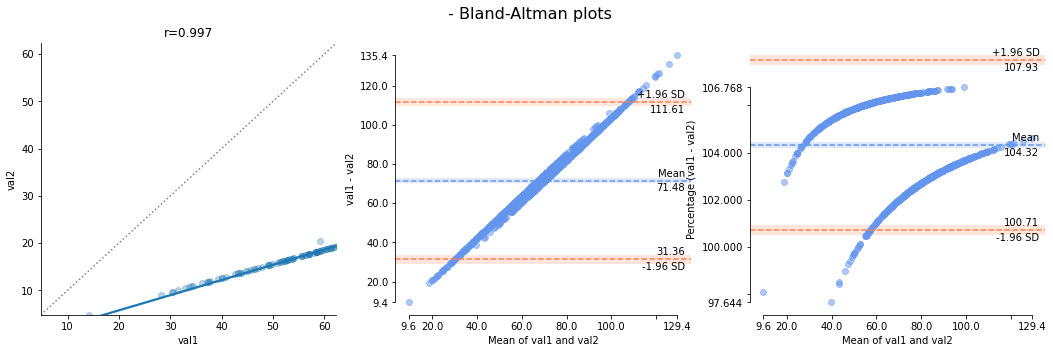

In [ ]:
data = generate_synthetic_data(n=1000)

bland_altman_triple_plot(data=data, m1_col="val1",m2_col="val2")

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()